In [52]:


%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [54]:
 bankData = pd.read_csv("/content/bank-full.csv", sep= ';')

In [55]:
bankData.isnull().values.any()

False

In [56]:
bankData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [57]:
bankData.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [58]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [59]:
bankData.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


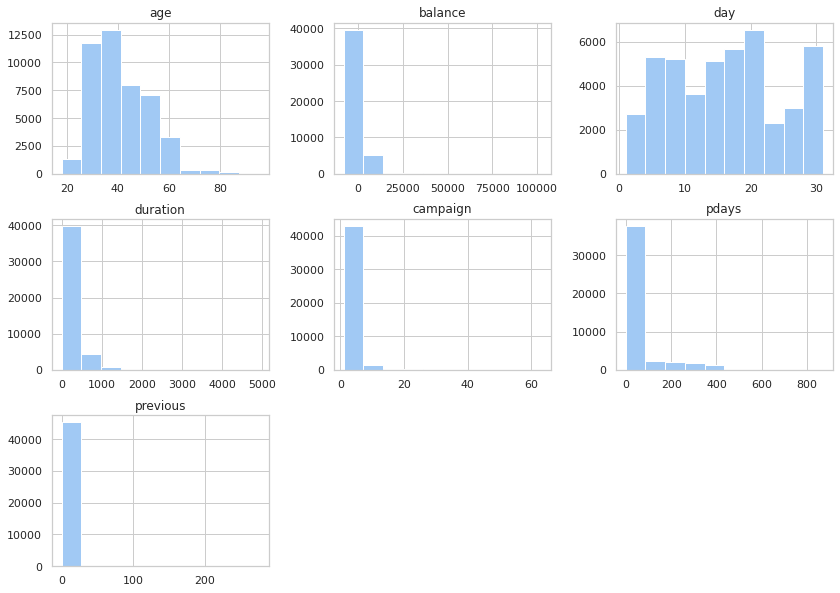

In [60]:
bankData.hist(bins= 10, figsize=(14, 10))
plt.show()

In [61]:
bankData.rename(columns={'y':'bankDeposit'}, inplace=True)
monthlySub = pd.crosstab(bankData['month'], bankData['bankDeposit']).apply(lambda x: x/x.sum() * 100)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


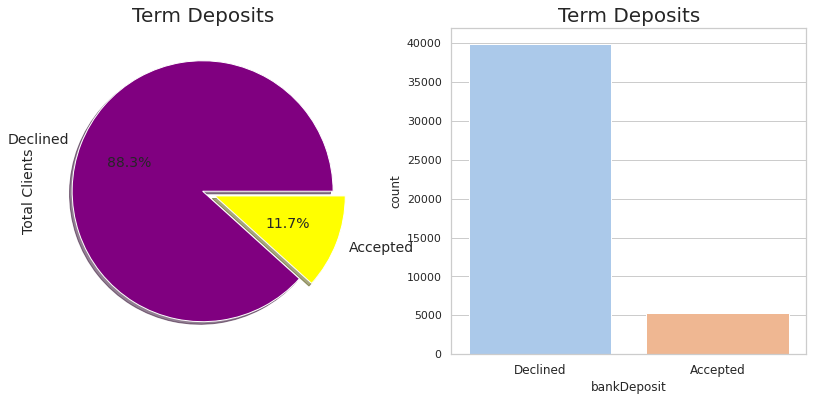

In [62]:


f,ax=plt.subplots(1,2, figsize=(14,6))
labels = 'Declined', 'Accepted'
colors = ['purple','yellow']
bankData['bankDeposit'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True,labels=labels,fontsize=14,colors = colors)
ax[0].set_title('Term Deposits', fontsize=20)
ax[0].set_ylabel('Total Clients', fontsize=14)
sns.countplot('bankDeposit',data=bankData,ax=ax[1])
ax[1].set_title('Term Deposits', fontsize=20,)
ax[1].set_xticklabels(['Declined', 'Accepted'], fontsize=12)
plt.show()



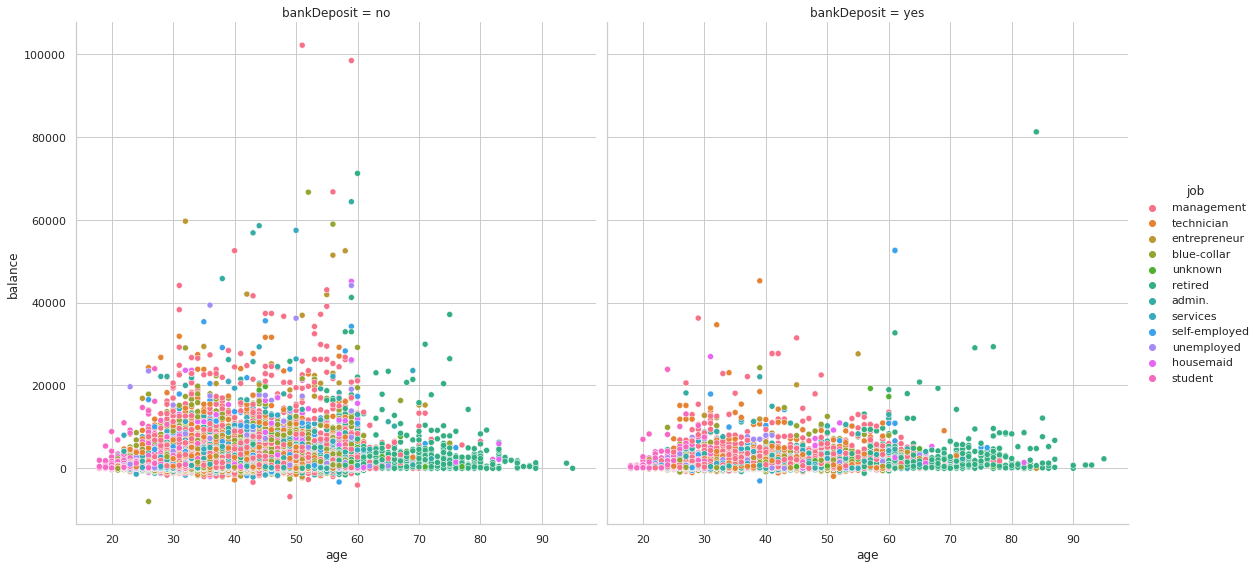

In [63]:


sns.relplot(x="age", y="balance", height= 8, aspect=1, hue="job", col="bankDeposit",data=bankData)
plt.show()



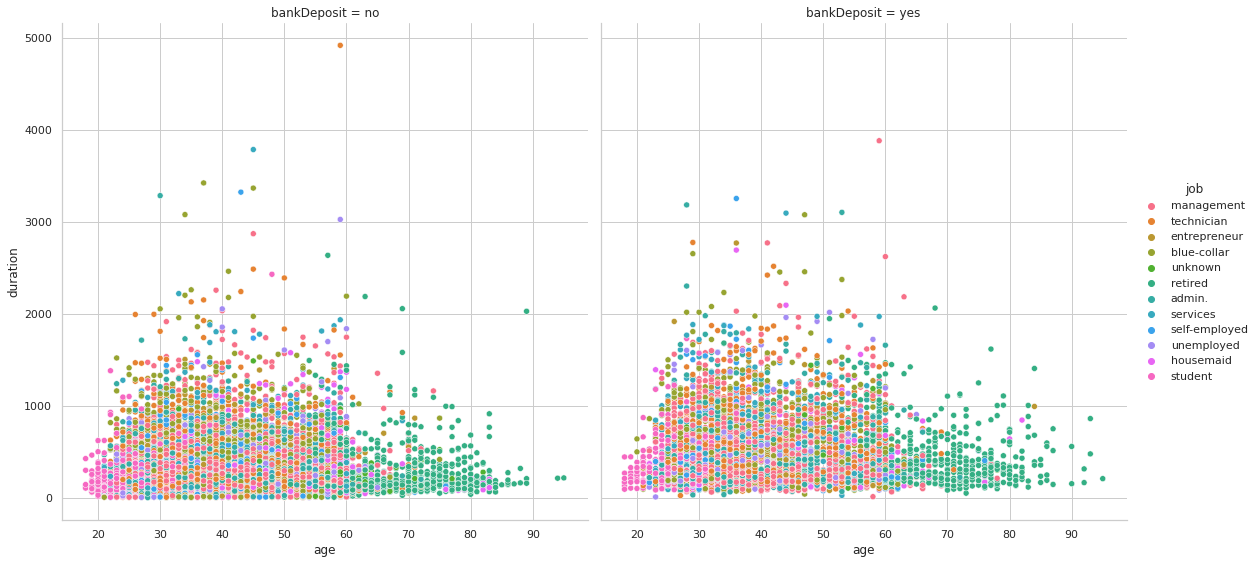

In [64]:

sns.set_theme(style="whitegrid", palette="pastel")
sns.relplot(x="age", y="duration", height= 8, aspect=1, hue="job", col="bankDeposit", data=bankData)
plt.show()



In [65]:


X = bankData.bankDeposit.value_counts()
X



no     39922
yes     5289
Name: bankDeposit, dtype: int64

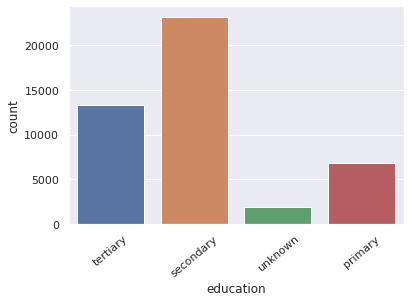

In [66]:

sns.set_theme(style="darkgrid")
sns.countplot(x="education", data=bankData)
plt.xticks(rotation = 40)
plt.show()



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


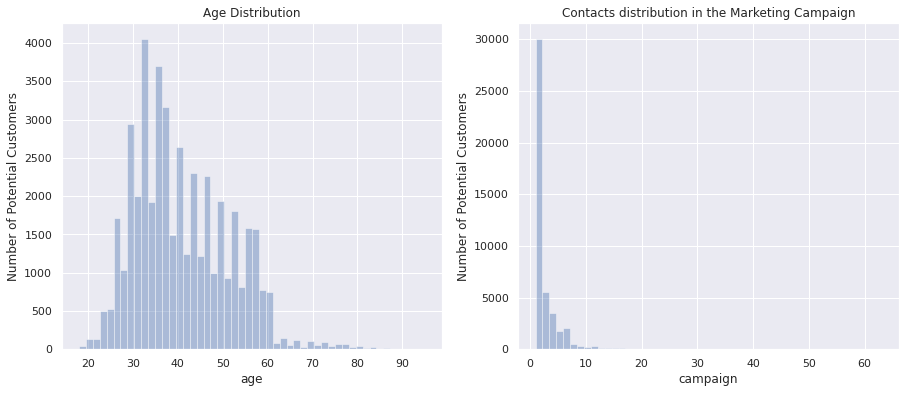

In [67]:
f, axes = plt.subplots(ncols=2, figsize=(15, 6))
sns.set_theme(style="whitegrid", palette="pastel")
sns.distplot(bankData['age'], kde=False, ax=axes[0]).set_title('Age Distribution')
axes[0].set_ylabel('Number of Potential Customers')


sns.distplot(bankData['campaign'], kde=False, ax=axes[1]).set_title('Contacts distribution in the Marketing Campaign')
axes[1].set_ylabel('Number of Potential Customers')

plt.show()

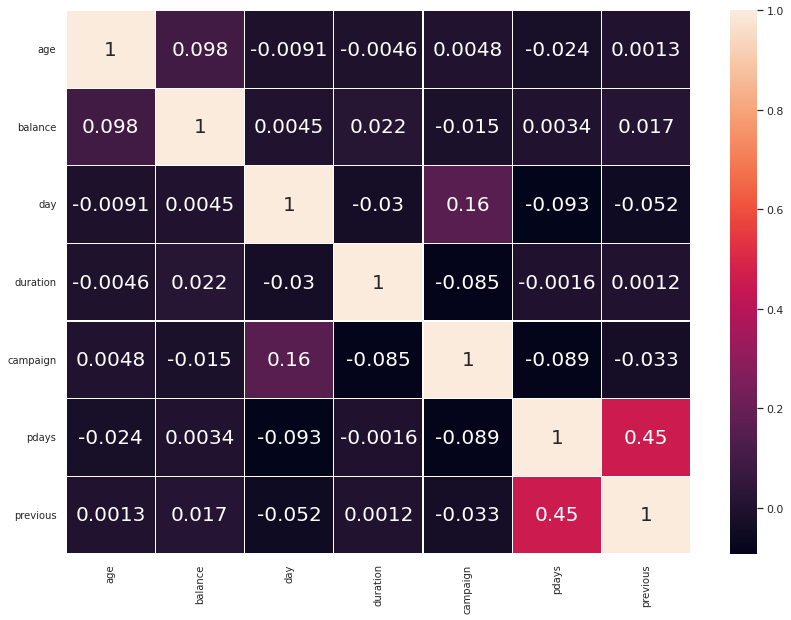

In [68]:
corr = bankData.corr()

sns.heatmap(corr,annot=True,linewidths=0.20,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(14,10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [69]:
pip install pyod

     |████████████████████████████████| 116 kB 5.2 MB/s 
  Created wheel for pyod: filename=pyod-0.9.9-py3-none-any.whl size=139325 sha256=e78712a2d757880df4495861c664381dd048230f26c415e8b28a66dc20ff9fb3
  Stored in directory: /root/.cache/pip/wheels/68/32/f0/0dc3050775e77b6661a116b70817b02b4305fa253269d6d998
Successfully built pyod


In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import cnames

from pyod.models.knn import KNN
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

%matplotlib inline


In [71]:

path = "/content/bank-full.csv"
bankData = pd.read_csv(path, sep= ';')


In [72]:

bankData.drop("duration", axis=1)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,4,-1,0,unknown,no


In [73]:


bankData.rename(columns={'y':'bankDeposit'}, inplace=True)



In [74]:


bankData.dtypes



age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day             int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
bankDeposit    object
dtype: object

In [75]:
# y column
# Binary Encoding
bankData['bankDeposit'] = np.where(bankData.bankDeposit == 'yes', 1, 0)

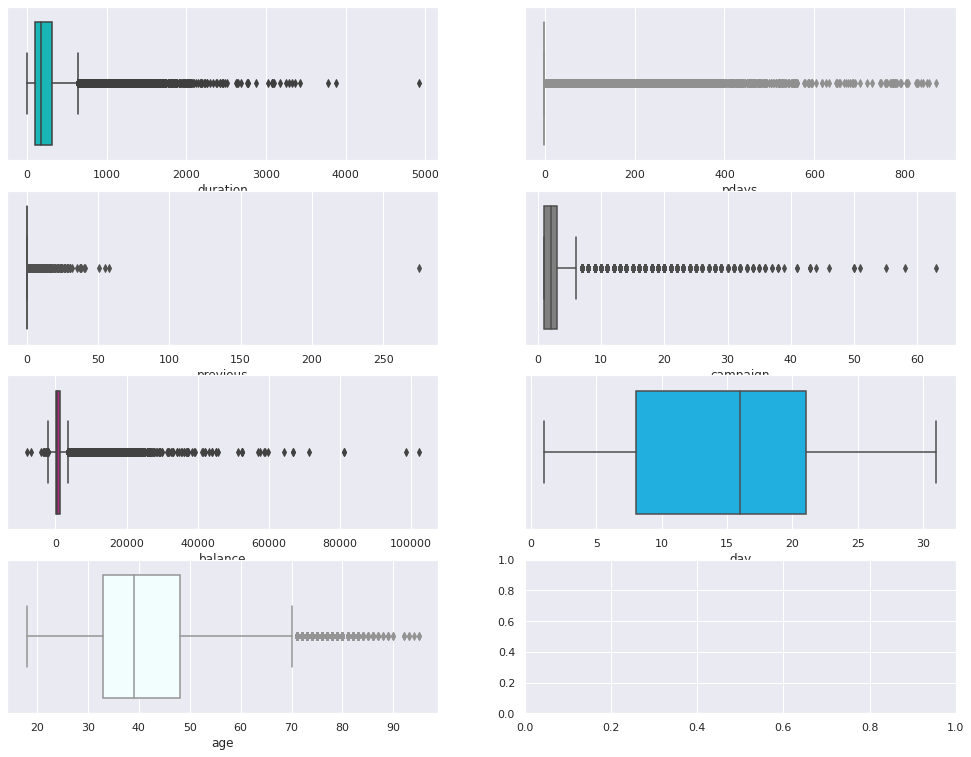

In [80]:


import random
from matplotlib.colors import cnames
corr = bankData.corr()['bankDeposit'].abs().sort_values(ascending=False)
h_corr_cols = corr[corr < 1].index.tolist()
colors = list(cnames.keys())
sns.set_style('darkgrid')
fig , ax = plt.subplots(4,2,figsize = (17,13))
ax = ax.ravel()
for i,col in enumerate(h_corr_cols):
    sns.boxplot(bankData[col], ax = ax[i],color = random.choice(colors))



In [26]:
x = bankData[h_corr_cols].values
model = KNN(contamination=.1)
model.fit(x)
predicted = model.predict(x)

outliers = bankData.loc[(predicted == 1),:]
inliers = bankData.loc[(predicted == 0),:]

In [27]:


bankData = bankData.drop(index = bankData.loc[(predicted == 1),:].index )



In [28]:


bankData.education.value_counts().to_frame()



,education
secondary,21425
tertiary,11832
primary,6330
unknown,1685


In [29]:


bankData['education'].replace({'basic.9y': 'basic','basic.4y': 'basic','basic.6y':'basic'},inplace=True)



In [30]:
bankData['education'].value_counts().to_frame() 

,education
secondary,21425
tertiary,11832
primary,6330
unknown,1685


In [31]:


bankData.job.value_counts().to_frame()



,job
blue-collar,9068
management,8415
technician,6996
admin.,4782
services,3882
retired,1925
self-employed,1412
entrepreneur,1371
unemployed,1166
housemaid,1148


In [32]:


#bankData['job'].replace({'entrepreneur': 'self-employed', 'technician': 'blue-collar',
                 #  'admin.': 'white-collar', 'management': 'white-collar',
                  #'services': 'pink-collar', 'housemaid': 'pink-collar'}, inplace=True)



In [33]:


bankData.job.value_counts().to_frame()



,job
blue-collar,9068
management,8415
technician,6996
admin.,4782
services,3882
retired,1925
self-employed,1412
entrepreneur,1371
unemployed,1166
housemaid,1148


In [34]:
bankData.shape

(41272, 17)

In [35]:
# categorical columns
# OneHotEncoding
cat_cols = bankData.select_dtypes(include=[
        'object']).columns
bankData = pd.get_dummies(bankData, columns=cat_cols)

In [36]:


#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = bankData.select_dtypes(include=['float64', 'int']).columns
print(num_cols)



Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'bankDeposit'],
      dtype='object')


In [37]:
num_cols = num_cols.drop('bankDeposit')
bankData[num_cols] = scaler.fit_transform(bankData[num_cols])

In [38]:


bankData.head(2)



,age,balance,day,duration,campaign,pdays,previous,bankDeposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1.653449,0.803475,-1.298406,0.147347,-0.5716,-0.364966,-0.272575,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.312772,-0.595780,-1.298406,-0.395616,-0.5716,-0.364966,-0.272575,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [39]:


bankData.shape



(41272, 52)

In [40]:


X = bankData.drop(columns=['duration', 'bankDeposit'])
y = bankData['bankDeposit']
print(X.shape)
print(y.shape)



(41272, 50)
(41272,)


In [41]:


y.value_counts().to_frame()  



,bankDeposit
0,37352
1,3920


In [42]:


RandomSampler = RandomOverSampler(random_state=42)

SampledX, sampledTarget = RandomSampler.fit_resample(X, y)
pd.Series(sampledTarget).value_counts().to_frame()



,bankDeposit
0,37352
1,37352


In [43]:


from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(SampledX)
X = pca.transform(SampledX)



In [44]:


print(SampledX.shape)
print(sampledTarget.shape)
print(X.shape)



(74704, 50)
(74704,)
(74704, 10)


In [45]:
bankData_y = pd.DataFrame(data = sampledTarget, columns = ['bankDeposit'])

bankData_X = pd.DataFrame(data = X, columns = ['PC_1', 'PC_2','PC_3', 'PC_4','PC_5','PC_6', 'PC_7','PC_8', 'PC_9','PC_10'])
bankData_X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10
0,-0.637920,1.624985,-1.417038,0.195585,-0.004910,0.957906,0.041482,1.626848,0.263641,0.102638
1,-0.454896,-0.319477,-1.463358,-0.861525,-0.238065,0.877691,0.399311,-0.019187,1.173636,-0.284149
2,-0.473031,-0.899855,-1.466343,-0.957899,-0.139916,1.173876,0.474305,0.083986,-0.376192,0.347585
3,-0.594131,0.601152,-1.457628,-0.227921,-0.062946,1.383995,0.275774,0.685286,0.076308,0.530468
4,-0.441441,-0.980734,-1.464827,-0.330522,-0.152382,-0.289073,0.345118,0.121521,1.151009,0.881494
...,...,...,...,...,...,...,...,...,...,...
74699,-0.428215,-0.808325,-0.350070,0.155736,-0.404396,-1.029860,0.009029,0.310178,-0.802649,0.486796
74700,0.979906,0.282361,-0.300642,-0.434889,-0.545948,-0.634144,-0.266337,-0.922875,0.354829,-0.191817
74701,-0.813229,2.730168,-0.530559,2.306410,0.555206,0.035491,-0.372621,0.151564,-0.121435,-0.167895
74702,1.850808,2.316429,-0.469338,1.446938,-0.080465,-0.373650,-1.017058,0.093032,0.723824,-0.206777


In [46]:


bankData_y.to_csv('results.csv', index=False)
bankData_X.to_csv('features.csv', index=False)



In [47]:


import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report
from sklearn.dummy import DummyClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt



In [48]:
X = pd.read_csv("features.csv")
y = pd.read_csv("results.csv")

In [49]:


KFold = KFold(n_splits = 10, shuffle = True, random_state = 4)
sKFold = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)



In [50]:
def ModelClassifier(model, X, y, cv):
    """
    Creates folds manually, perform 
    Returns an array of validation (recall) scores
    """
    if cv == 'KFold':
        cv = KFold(n_splits = 10, shuffle = True, random_state = 4)
    elif cv == 'sKFold':
        cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 4)
    else:
        cv == None
    
    scores = []
    
    
    for trainIndex,testIndex in cv.split(X,y):
        XTrain,X_test = X.loc[trainIndex],X.loc[testIndex]
        yTrain,y_test = y.loc[trainIndex],y.loc[testIndex]

        # Fit the model on the training data
        model_obj = model.fit(XTrain, yTrain)
        yPrediction = model_obj.predict(X_test)
        # Score the model on the validation data
        score = accuracy_score(y_test, yPrediction)
        report = classification_report(y_test, yPrediction)
        confusionMatrix = confusion_matrix(y_test, yPrediction)
        
        scores.append(score)
        mean_score = np.array(scores).mean()
        
    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print('--------------------------------------')
    print(report)
    
    print('\n Confusion Matrix of the model')
    print('--------------------------------------')
    print(confusionMatrix)

In [51]:
def RocPlot(model, X, y, cv):
  '''ROC plot function '''
    
  for trainIndex,testIndex in cv.split(X,y):
    XTrain,X_test = X.loc[trainIndex],X.loc[testIndex]
    yTrain,y_test = y.loc[trainIndex],y.loc[testIndex]
    model_obj = model.fit(XTrain, yTrain)
    yPrediction = model_obj.predict(X_test)
    yPredProbabilty = model_obj.predict_proba(X_test)[:,1]
      
  logisticRocAuc = roc_auc_score(y_test, yPrediction)
  fpr, tpr, thresholds = roc_curve(y_test, yPredProbabilty)
  plt.figure()
  ValidationModel = str(model)
  plt.plot(fpr, tpr, label= ValidationModel + ' (area = %0.2f)' % logisticRocAuc)
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic')
  plt.show()

In [52]:


LogisticReg = LogisticRegression()
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], "solver":['liblinear', 'saga']}
LogisticRegcv = RandomizedSearchCV(LogisticReg, grid)



In [53]:


ModelClassifier(LogisticRegcv, X, y, KFold)



Accuracy scores of the model: 0.66

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.62      0.64      3755
           1       0.64      0.69      0.66      3715

    accuracy                           0.65      7470
   macro avg       0.66      0.65      0.65      7470
weighted avg       0.66      0.65      0.65      7470


 Confusion Matrix of the model
--------------------------------------
[[2327 1428]
 [1154 2561]]


In [54]:


ModelClassifier(LogisticRegcv, X, y, sKFold)



Accuracy scores of the model: 0.66

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      3735
           1       0.65      0.70      0.68      3735

    accuracy                           0.66      7470
   macro avg       0.67      0.66      0.66      7470
weighted avg       0.67      0.66      0.66      7470


 Confusion Matrix of the model
--------------------------------------
[[2350 1385]
 [1118 2617]]


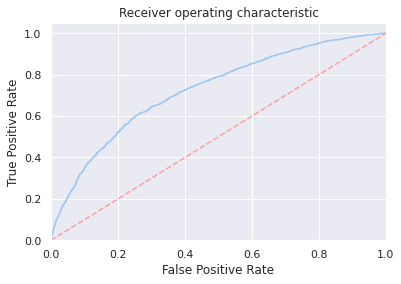

In [55]:


RocPlot(LogisticRegcv, X, y, sKFold)



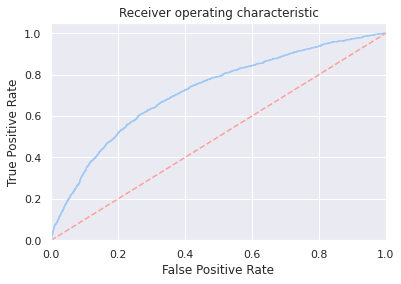

In [56]:


RocPlot(LogisticRegcv, X, y, KFold)



In [57]:


XGBClassifier = XGBClassifier( base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              enable_categorical=False, gamma=1.5, 
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=1,
              n_estimators=600, n_jobs=1, nthread=1, num_parallel_tree=1,
               random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              validate_parameters=1, verbosity=1)



In [58]:
ModelClassifier(XGBClassifier, X, y, KFold)

Accuracy scores of the model: 0.76

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      3755
           1       0.76      0.74      0.75      3715

    accuracy                           0.76      7470
   macro avg       0.76      0.76      0.76      7470
weighted avg       0.76      0.76      0.76      7470


 Confusion Matrix of the model
--------------------------------------
[[2897  858]
 [ 952 2763]]


In [59]:


ModelClassifier(XGBClassifier, X, y, sKFold)



Accuracy scores of the model: 0.77

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.78      0.77      3735
           1       0.78      0.76      0.77      3735

    accuracy                           0.77      7470
   macro avg       0.77      0.77      0.77      7470
weighted avg       0.77      0.77      0.77      7470


 Confusion Matrix of the model
--------------------------------------
[[2914  821]
 [ 879 2856]]


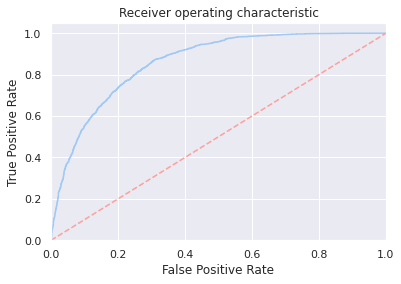

In [60]:


RocPlot(XGBClassifier, X, y, sKFold)



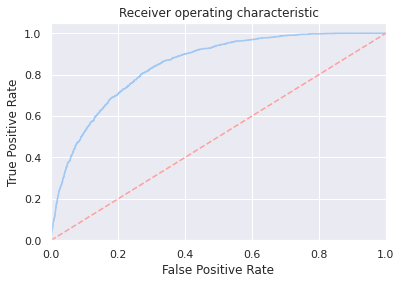

In [61]:


RocPlot(XGBClassifier, X, y, KFold)



In [62]:


mlp = MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 30, 10), learning_rate='adaptive',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)



In [63]:
ModelClassifier(mlp, X, y, sKFold)

Accuracy scores of the model: 0.73

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      3735
           1       0.74      0.71      0.73      3735

    accuracy                           0.73      7470
   macro avg       0.73      0.73      0.73      7470
weighted avg       0.73      0.73      0.73      7470


 Confusion Matrix of the model
--------------------------------------
[[2824  911]
 [1080 2655]]


In [64]:
ModelClassifier(mlp, X, y, KFold)

Accuracy scores of the model: 0.73

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      3755
           1       0.73      0.72      0.72      3715

    accuracy                           0.73      7470
   macro avg       0.73      0.73      0.73      7470
weighted avg       0.73      0.73      0.73      7470


 Confusion Matrix of the model
--------------------------------------
[[2752 1003]
 [1043 2672]]


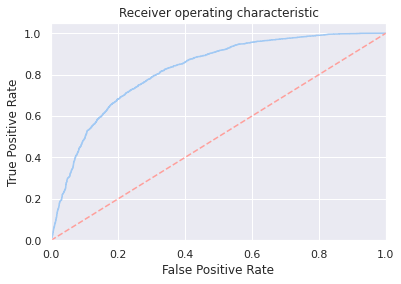

In [65]:
RocPlot(mlp, X, y, sKFold)

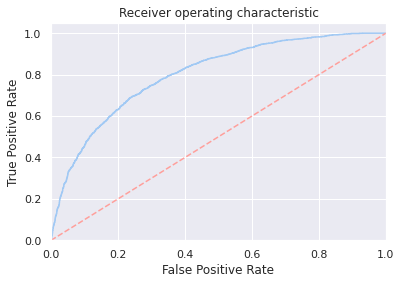

In [66]:


RocPlot(mlp, X, y, KFold)



In [67]:
from sklearn.ensemble import RandomForestClassifier
RandomForestclassifier = RandomForestClassifier(max_depth=15,criterion='entropy')   


In [68]:
ModelClassifier(RandomForestclassifier, X, y, KFold)

Accuracy scores of the model: 0.92

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3755
           1       0.88      0.96      0.92      3715

    accuracy                           0.91      7470
   macro avg       0.92      0.91      0.91      7470
weighted avg       0.92      0.91      0.91      7470


 Confusion Matrix of the model
--------------------------------------
[[3256  499]
 [ 141 3574]]


In [69]:
ModelClassifier(RandomForestclassifier, X, y, sKFold)

Accuracy scores of the model: 0.92

 Classification report of the model
--------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      3735
           1       0.89      0.96      0.92      3735

    accuracy                           0.92      7470
   macro avg       0.92      0.92      0.92      7470
weighted avg       0.92      0.92      0.92      7470


 Confusion Matrix of the model
--------------------------------------
[[3269  466]
 [ 139 3596]]


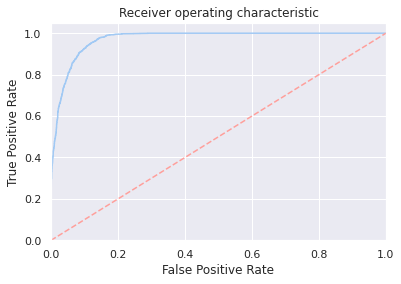

In [70]:
RocPlot(RandomForestclassifier, X, y, sKFold)

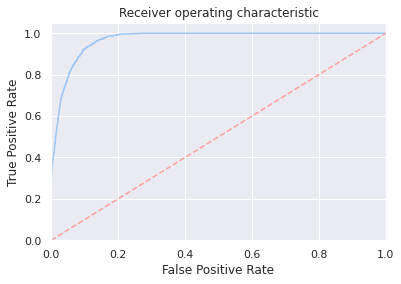

In [71]:
RocPlot(RandomForestclassifier, X, y, KFold)